# Machine Learning Engineer Nanodegree
## Allstate Claim Severity Capstone Project
Jose Garcia  
December 31st, 2050

## I. Definition

### Project Overview

Allstate is on the largest personal insurance companies in the United states and protects millions of people from potentials damages. When car accidents happen or when other unexpected disasters occur it is a huge relief knowing you are cover by some type of insurance. Recently my girlfriend was involved in a car accident that almost totaled her car. Although she escaped with no bodily injuries her car had thousands of dollars in damages. Luckily, she has full coverage insurance and was able to get all repairs paid for and a rental car without paying anything out of pocket. This event peaked my interest in to insurance business which lead me to this project. Although for this particular instance the insurance claim process was easy and straight forward it is not always the case. This is why Allstate is currently developing automated methods of predicting the cost, and hence severity, of a claim. This project will provide insight into better ways to predict claims severity.

Dataset can be found on the Kaggle website at https://www.kaggle.com/c/allstate-claims-severity/data

### Datasets and Inputs

For this project Allstate provides a test.csv and train.csv. 

The train.csv contains the following:
 * claim id
 * cat 1 to cat 116 - this data is category based and contains either single letters or two letters
 * cont1 to cont14 - this data is a continues set of numbers that are not negative
 * loss - this is the ammount that the insurance company has to payout and this is also the target variable
 * 188,318 rows
 * 132 columns
 
The test.csv file containt the same information as train.csv except for the loss because it needs to be predicted.
 * 89,023 rows
 * 131 columns

### Problem Statement

Allstate is attempting to improve its customer experience by automating methods of predicting the severity of a claim. The severity of a claim is based on a combination of different parameters that are unique to every claim. An insurance adjuster takes a look at each claim and all of its parameters and determines how much will be paid out to the customer. In some cases, the claim is quickly resolved but there is some instances in which it takes a long time to resolve the claim. For this project a training set of data will be used to train a machine learning algorithm to predict the cost of a claim based on the given parameters of the claim. This data will be used to train a linear regression learning algorithm to predict the loss.

### Metrics

Kaggle will be evaluating this project using mean absolute error and the lower the mean absolute error the better.  Mean absolute error is a measure of the average difference between the actual loss and predicted loss. Other scoring functions could have been used like r2 score or RMSE. The r2 score calculates the variance in the dependent variable that is predictable from he independent variable. This will not work for this particular problem because the data is better understood by calculating magnitude of different of the actual and predicted value. MAE weighs every value the same as opposed to RMSE which penalizes some values more than others. For this problem MAE is better suited because of its simplicity. Also, the fact that this a Kaggle competition, MAE works better for determining a winner out of thousands of entries. 

<img src="mean-absolute-error.png" width="300">
### <center>Figure 1: Mean Aboslute Error</center>


## II. Analysis

### Data Exploration

Below are the first five rows of the "trian.csv" data set. The data set is composed of an id number, category data, continues data, and a column labeled "loss". There is a total of 188,318 rows and 132 columns of data but not all of these parameters are useful for building our predictive model. The column labeled "id" will be dropped because it does not add any value to our algorithm. The "loss" column will also be dropped because this is the value that needs to be predicted and should not be mixed in with our features. Now there are only two types of data, non-numeric, which is composed of letters and numerical data which is composed of continues numbers. There is a total of 14 columns of continues data and 116 columns of non-numeric data. Right below the "train.csv" data set is the "test.csv" data which is exactly the same except that it does not have the "loss" column. 
***

<img src="train_data.png" width="1000">
### <center>Figure 2: train.csv</center>

<img src="test_data.png" width="1000">
### <center>Figure 3: test.csv</center>


***
From this point on the "train.csv" data is the only data set that will be analyzed.

In order to get a better understanding of the data it must be represented in different forms in order to get different types of information. Running basic statistical analysis on the continues data reveals key facts. A few things to take away from the statistical parameters below is that the maximum value for all of the continues parameters is about 1 and the mean average number is about 0.5. Because the range of the continues numbers is small they are prefect to use with a learning algorithm. The "loss" column on the other hand has a wide range of values and this will be problematic when applying it to a learning algorithm.


***


<img src="data_description.png" width="800">
<img src="data_description2.png" width="600">
### <center>Figure 4: Data Description</center>

***
Now the skewness of the parameters are analyzed to get and understand of the overall distribution of the data. The only parameter that significantly stands out is "loss".

***

<img src="skew.png" width="200">
### <center>Figure 5:  Skewness</center>



***
Figure 6 shows the loss data plotted on a histogram chart and we can see that the data is skewed to the right, so it needs to be normalized. Regression algorithms can be sensitive to the distribution of values and can results in the model underperforming if the data is not normally distributed. Figure 6 also shows logarithmic transformation applied to the "loss" data so that it does not negatively affect the performance of the learning algorithm. Appling the transformation will reduce the range of the values.
***

Loss data | Log Transformed Loss Data
- | - 
<img src="loss_skew.png" width="400"> | <img src="loss_corr.png" width="400">
### <center>Figure 6:  "Loss" Logorithmic Transformation</center>




***
Shown in Figure 7 is the non-numerical data broken down into different components. The table below shows how many unique variables are in each column of non-numeric data.


***

<img src="cat_data.png" width="400">
### <center>Figure 7:  Number of Unique Non-Numerical Values</center>

***
Typically learning algorithms expect input to be numeric so all non-numeric data must be converted into numeric data. There are many ways to do so but for this project we will be using the pandas factorize operation. This method encodes the input values by assigning a unique number to each value. One hotkey encoding code have also been used but it produces allot of parameters that drastically slow down the learning algorithm
***

<img src="hotkey.png" width="900">
### <center>Figure 8:  Non-nemeric Data Coverted to Numeric Data</center>

***
The data has been clearly defined and pre-processed. In Figure 9 is the end result that we need in order to start training out learning algorithm. 
***

<img src="contcat.png" width="1000">
### <center>Figure 9:  Training Data After Cleaning</center>

<img src="cont1.png" width="300">
<img src="cont2.png" width="300">
<img src="cont3.png" width="300">
<img src="cont4.png" width="300">

### Data Preprocessing

Before the data can be feed into the any learning algorithm it must be separated into a training and testing sets. Splitting the data and randomizing it removes any hidden bias or variances. This is because the model needs to be tested on unseen data. The mean absolute error of the testing model is then compared to the training model to check for over fitting or under fitting.

The data is slit into a training and testing data sets.
* Training set has 141238 samples.
* Testing set has 47080 samples.

### Algorithms and Techniques


Three different repressors will be taken into consideration linear regression, random forest regression, and extreme gradient regression. The mean absolute error of a un-tuned Linear regression model will be used as our bench mark that we need to beat.

#### Linear Regression
* Linear Regression is used to model the relationship between two variables
* It does this by plotting a line and minimizing the distance between that line and the data as show in Figure 10
* It great starting point when analyzing data because of its simplicity
* The error increases when trying to apply this to non linear data


<img src="linear.png" width="200">
### <center>Figure 10:  Linear Regression Example</center>

#### XGBoost (Extreame Gradient Decent)
* XGboosting stands for extreme gradient boosting algorithm and is part of a group of learning algorithms called ensemble methods. 
 * There are three types of ensemble methods and XGBoosting is a part of the boosting class of ensemble methods.
 * XGBoosting runs multiple decision tree algorithms and each of which learns to fix the prediction errors of a prior model in the chain. 
 * This can be compared to how a basketball player shoots a basketball. If the basketball player misses the shot, then the next shot the basketball player takes is corrected based on how far off his first shot was from the goal. The basketball player will continue to adjust this technique until he makes perfect shots. 
 * Below in **Figure 11** is the Newton Tree Boosting algorithm used by XGBoosting
 * The main advantage of XGBoosting is the executiong speed and accuracy
 * A disadvantage is that it is prone to over fitting


<img src="newton.png" width="500">
### <center>Figure 11:  Newton Tree Boosting</center>


### Benchmark

The data in training on an un-tuned Linear Regression and XGBoost Model to set our baseline. The benchmark for this project is set by the un-tuned Linear Regression model as a basis for determining how well our XGBoost Model performs. Mean Absolute Error is the metric that will be used for determining how good our models perform. The lower the mean absolute error is the better our model is performing. The train.csv file has a total of 188,318 data points and this is split up in to 25% training and 74% testing. In **Figure 11** below an un-tuned linear regression and XGB regression algorithm area applied to 1%, 10%, an 100% of the data to see how the error changes as you add more data. The lowest mean absolute error for using Linear Regression is 1341.72 and that will be the benchmark for the XGBoost model.

<img src="linearxgb.png" width="400">
### <center>Figure 12:  Linear Regression and XGBoost Results</center>

## III. Methodology

### Implementation and Refinement

Initially the XGBoost algorithm was implement that was in the form of an numpy array. Early on training and predicting the models was very time consuming taking up to and hour to train what I thought was simple model. This made me realize that I was more than likely doing something wrong. I went back through the XGBoost documentation to make sure that I understood exactly how the algorithm worked. Through this I found out that XGBoost does not work efficiently with numpy arrays and instead prefers to use a Dmatrix. The Dmatrix is a data structure that is specifically used by XGBoost in order to optimize memory and training speed.

Running the XGBoost algorithm using a linear objective function and with 50 boosting rounds results in a mean absolute error of 1162. This will used as the base model because all parameters were set to their default values. In order to optimize the algorithm the following parameters will be changed one at a time until the optimal combination of parameters is found. 
* eta - learning rate of the model
* max_depth - This is the maximum depth of the tree. A low number will probably not capture nonlinear features and a high number makes the model more complex.
* min_child_weight - This parameter prevents under fitting

The data exploration section shows and explains how the data was preprocessed. Now the next step to separate the data in to training and testing sets. After which we can begin to train the algorithm but before anything can be done the correct libraries must be imported.

They are:
 * from sklearn.cross_validation import train_test_split - this will allow the data to be split into tranining and testing sets
 * from sklearn.metrics import mean_absolute_error - this will calculate mean absolute error
 * from sklearn.metrics import make_scorer - allows means absolute error to be used with XGboost
 * from time import time - this will import a clock to keep track of time
 * import xgboost as xgb - this will import extreme gradient boosting and all functions associated with it


#### Training the Base Model

The follow step were taken to train the base model:
1. The data is separated into a training and data sets with the code below.
 * X_train, X_test, y_train, y_test = train_test_split(cat_cont_data, loss_log_transformed, test_size = 0.25)

2. The data has to then be converted into a DMatrix because it will allow XGBoost to run more efficiently
 * dtrain = xgb.DMatrix(data=X_train, label=y_train)
 * dtest = xgb.DMatrix(data=X_test, label=y_test)
 
3. The parameters dictionary has to be set will all relevant parameters. For this model the only parameter that will be use is linear regression.
 * xgb_params = {'objective': 'reg:linear',}
 
4. The algorithem is now trained.
 * bst_cv1 = xgb.train(params=xgb_params, dtrain=dtrain, num_boost_round=50)
 
5. The testing data can now be predicted
 * predictions_test = bst_cv1.predict(dtest)
 
6. The actual "loss" values for the testing data are know so they are pulled to compare to the predicted values
 * y_te = dtest.get_label()
 
7. Because the "loss" data was transformed using the log function they have to be converted back using the expoenetial function
 * np.exp(y_te)
 * np.exp(predictions_test)
 
8. The mean aboslute error can now be calculated
 * MAE = mean_absolute_error(np.exp(y_te), np.exp(predictions_test))
 * MAE = 1162


##### The following steps were taken to tune the algorithm.

For each of the follow sets of parameters a for loop was created to train each combination of parameters. After each set an optimal parameter was found and added to the next set of parameters.

1.  'eta': [ 0.2, 0.3, 0.4, 0.5, 0.6] was trained with num_boost_round = 50
    * optimal param = 'eta': 0.3
    * MAE = 1162
 
2. 'eta': 0.3, 'max_depth': [6,8,10,12,14] , 'child_weight': [4,6,8,10,12], 'num_boost_round': 50
    * optimal param = eta': 0.3, 'max_depth': 6 , 'child_weight': 8, 
    'num_boost_round': 50
    * MAE = 1160
    
3. 'eta': [0.05, 0.1, 0.2, 0.3], 'max_depth': 6 , 'child_weight': 8, 'num_boost_round': 100
    * optimal param = eta': 0.2, 'max_depth': 6 , 'child_weight': 8, 
    'num_boost_round': 100
    * MAE = 1152

4. 'eta': [0.05, 0.1, 0.2, 0.3], 'max_depth': 6 , 'child_weight': 8, 'num_boost_round': 200
    * optimal param = eta': 0.1, 'max_depth': 6 , 'child_weight': 8, 
    'num_boost_round': 200
    * MAE = 1147
    
Below is a basic example of how the learning algorithm was trained.

In [ ]:
# This dictionary contains all parameters that will be used
xgb_params = {'objective': 'reg:linear'}

# The scoring function is assigned
scorer = make_scorer(mean_absolute_error)


results = {}
start = time()

# The algorithm is trained with the given parameters
bst_cv1 = xgb.train(params=xgb_params, dtrain=dtrain, num_boost_round=50,feval=scorer)
end = time()
results['train_time'] = end - start

start = time()
# predictions are made on the training and testing data
predictions_train = bst_cv1.predict(dtrain)
predictions_test = bst_cv1.predict(dtest)
end = time()
results['pred_time'] = end - start

# The predictions are pulled from the Dmatrix
y_tr = dtrain.get_label()
y_te = dtest.get_label()


# The results are first normalized because they are in exponential form.
# Then the mean absolute error can be calculated
results['acc_train'] = mean_absolute_error(np.exp(y_tr), np.exp(predictions_train))
results['acc_test'] = mean_absolute_error(np.exp(y_te), np.exp(predictions_test))

# The code below prints on the mean absolute error and time it took to train and prediction the model
print "params {}".format(xgb_params)
print "Trained score = {:.2f} and test score = {:.2f}".format(results['acc_train'],results['acc_test'])
print "Trained time = {:.2f} and pred time = {:.2f}".format(results['train_time'],results['pred_time'])


## IV. Results

### Model Evaluation and Validation

After fine tuning the model using various parameters the best answer was achieved using the following parameters.
***
xgb_params = {'eta': 0.1, 'objective': 'reg:linear', 'max_depth': 6, 'min_child_weight': 8,}
***
Using these parameters, a Mean Absolute Error of 1147.20 was found.

A quick sensitivity analysis was performed on the algorithm using these optimal parameters to see how the model reacts to a different set of data. The data set was split using a random state of 5 and 10.

 * Original split:   mae = 1147.20

 * Random state 5:  mae = 1146.85

 * Random state 10: mae = 1151.03

There is a difference of about 3.83 between the highest and lowest MAE score. This is due to the fact that all three of these models were trained and tested on different combinations of the same data set. Some slight variations are expected but for the purpose of this project the variation in the sets are acceptable.



### Justification
Since this is a Kaggle competition it is difficult to say whether the problem has been solved or not. The only thing we can go by is by the benchmark that was set and by comparing with other Kaggle scores. The final model outperformed the benchmark score of 1334. Currently the top Kaggle score is 1096 which is 189 points lower than what was calculated here. The model still needs work but for the purpose of this project it has met all expectation.


## V. Conclusion

### Visualization

**Figure 13** shows the feature importance graph produced by the extream gredient boostin model. This chart shows the F_score for each feature in the data set. The F_core is calculated by taking the average number of times the feature is used to split a tree that improves the perforance measure. The features with the highest F_score have the most impact on the model. It is interesting to see that out of all 130 feature there is only a handfull of features that have a significant impact on the model.



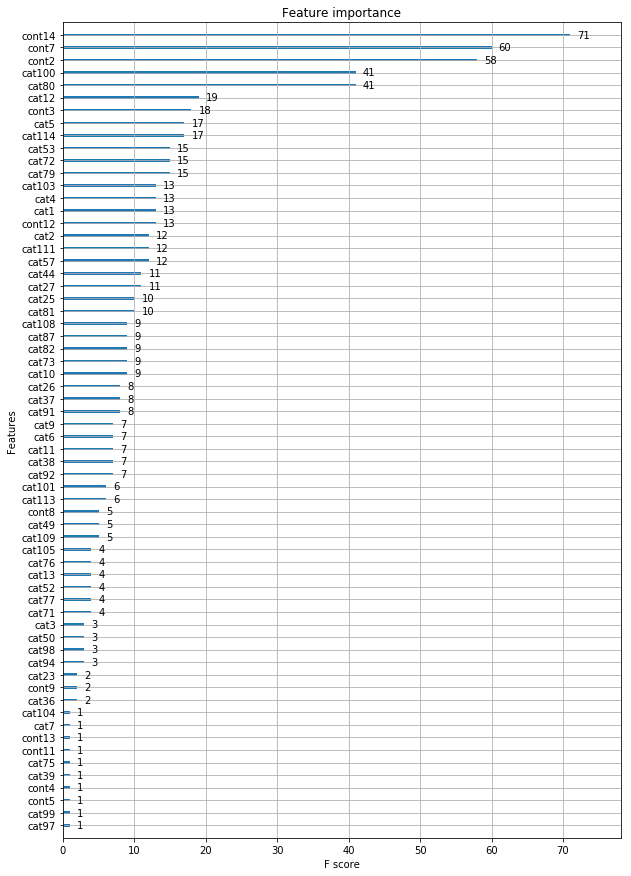
### <center>Figure 13:  Feature Importance</center>

### Reflection

* In this project a data set was taken and processed in order to make it usable for the learning algorithm. Two different types of learning algorithms were used in this project, linear regression and XGBoost. An un-tuned linear regression model was used as a base model to compare our XGBoost model to. An un-tuned XGBoost model had a mean absolute error of 1178 but by tuning various parameters the mean absolute error was brought down to 1153.
* This model was very complex in the sense that it had many parameters and allot of data points. This posed many challenges and limitations on obtaining a better solution. The fact that the data set was so large made running models very time consuming. 
* This was a very interesting and eye-opening project and motivates me to learn more about data science and machine learning. I have a couple of friends that work for large corporations like Walmart and AT&T in the automation and data science departments. Their job is find area of work were automation can be implemented in order reduce cost. In some cases, it can turn into a tense situation because people are losing their jobs, but this is the way forward.

### Improvement

There is always more work to be done but running these models is very time consuming. Another option might be to use cloud computing to speed up the process but that is out of the scope of this project. One option that I did not consider until now is finding the features that are most important and focusing more on those. This might help eliminate noise cause by features with little relevance. I used XGBoost because it was simple to understand but maybe in the future I will try to solve this problem using a Convolution Neural Network.

### References

 1. Allstate Claims Severity, Kaggle 
    * https://www.kaggle.com/c/allstate-claims-severity
    * https://www.kaggle.com/c/allstate-claims-severity/data
      
 2. Regression
    * https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/
    * https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/
    
 3. Allstate Insurance
    * https://en.wikipedia.org/wiki/Allstate